# Faulty Wafer Component Prediction

**Brief:** In electronics, a **wafer** (also called a slice or substrate) is a thin slice of semiconductor, such as a crystalline silicon (c-Si), used for the fabrication of integrated circuits and, in photovoltaics, to manufacture solar cells. The wafer serves as the substrate(serves as foundation for contruction of other components) for microelectronic devices built in and upon the wafer. 

It undergoes many microfabrication processes, such as doping, ion implantation, etching, thin-film deposition of various materials, and photolithographic patterning. Finally, the individual microcircuits are separated by wafer dicing and packaged as an integrated circuit.

## Problem Statement

**Data:** Wafers data


**Problem Statement:** Wafers are predominantly used to manufacture solar cells and are located at remote locations in bulk and they themselves consist of few hundreds of sensors. Wafers are fundamental of photovoltaic power generation, and production thereof requires high technology. Photovoltaic power generation system converts sunlight energy directly to electrical energy.

The motto behind figuring out the faulty wafers is to obliterate the need of having manual man-power doing the same. And make no mistake when we're saying this, even when they suspect a certain wafer to be faulty, they had to open the wafer from the scratch and deal with the issue, and by doing so all the wafers in the vicinity had to be stopped disrupting the whole process and stuff anf this is when that certain wafer was indeed faulty, however, when their suspicion came outta be false negative, then we can only imagine the waste of time, man-power and ofcourse, cost incurred.

**Solution:** Data fetched by wafers is to be passed through the machine learning pipeline and it is to be determined whether the wafer at hand is faulty or not apparently obliterating the need and thus cost of hiring manual labour.

## # Import Required Libraries:

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Load the feature store file as dataframe

from wafer.entities.artifact import DataIngestionArtifact

feature_store_file_path = DataIngestionArtifact.feature_store_file_path
wafers = pd.read_csv(feature_store_file_path)
wafers.head()

,Wafer,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-1201,3045.98,2544.85,2253.3444,1873.8678,1.1691,100.0,94.9722,0.1210,1.4752,...,NaN,0.4948,0.0123,0.0033,2.4804,0.0291,0.0102,0.0033,35.0279,-1
1,Wafer-1202,3151.98,2563.75,2175.2556,1022.1660,1.2833,100.0,100.6222,0.1250,1.4536,...,NaN,0.5063,0.0113,0.0031,2.2284,0.0291,0.0102,0.0033,35.0279,-1
2,Wafer-1203,3071.18,2489.86,2195.3000,1151.8233,0.9220,100.0,103.5467,0.1232,1.4826,...,NaN,0.5033,0.0112,0.0029,2.2320,0.0291,0.0102,0.0033,35.0279,-1
3,Wafer-1204,2958.46,2523.78,2171.8556,1156.6018,1.4025,100.0,100.1367,0.1243,1.4645,...,NaN,0.4954,0.0136,0.0033,2.7511,0.0291,0.0102,0.0033,35.0279,-1
4,Wafer-1205,3196.21,2413.39,2255.5222,1763.0739,1.2226,100.0,101.5878,0.1200,1.4845,...,353.8319,0.5058,0.0094,0.0026,1.8673,0.0053,0.0188,0.0057,353.8319,-1


In [3]:
## Wafers' Info

wafers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 837 entries, 0 to 836
Columns: 592 entries, Wafer to Good/Bad
dtypes: float64(577), int64(14), object(1)
memory usage: 3.8+ MB


In [4]:
## Description of `wafers`

wafers.describe()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
count,836.000000,834.000000,824.000000,824.000000,824.000000,824.0,824.000000,829.000000,835.000000,835.000000,...,335.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,3020.762560,2495.829916,2200.208587,1474.891287,6.792812,100.0,99.901496,0.121398,1.448893,0.000202,...,96.403949,0.499950,0.015053,0.003768,3.015719,0.023074,0.015922,0.005121,91.393672,-0.911589
std,80.110713,71.607771,30.926326,530.078688,77.296175,0.0,7.712145,0.012149,0.079059,0.014746,...,90.001072,0.003258,0.016511,0.003582,3.446470,0.013394,0.009087,0.003061,89.302699,0.411349
min,2770.400000,2233.290000,2060.660000,0.000000,0.753100,100.0,82.131100,0.000000,1.200500,-0.036800,...,0.000000,0.477800,0.006000,0.002000,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2970.750000,2452.182500,2184.213875,1110.206750,1.093650,100.0,95.836675,0.121200,1.394950,-0.009600,...,43.832600,0.497900,0.011600,0.003100,2.305900,0.015300,0.009800,0.003200,41.078200,-1.000000
50%,3014.290000,2499.735000,2202.188900,1298.430900,1.317100,100.0,100.180000,0.122700,1.441800,-0.000200,...,69.299400,0.499900,0.013600,0.003500,2.718400,0.021800,0.014500,0.004500,65.484200,-1.000000
75%,3061.625000,2537.675000,2216.500000,1751.834850,1.572600,100.0,104.336700,0.124000,1.502550,0.008900,...,116.395700,0.502100,0.016300,0.004000,3.252200,0.027800,0.019300,0.006000,104.303400,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509500,0.471400,0.103900,98.662800,0.102800,0.079900,0.028600,737.304800,1.000000


### Insight:

From the gist of only shown columns, it looks like some of features have pretty bad outliers. One thing is for sure, the data must be standardized.

In [5]:
## Looking at the Cats in our Target feature

wafers["Good/Bad"].value_counts()

-1    800
 1     37
Name: Good/Bad, dtype: int64

### Insight:

Heavily imbalanced. Definitely gonna need `resampling`.

### # Analyze Missing Data:

Firstly, we'll check the missing data in the target feature and drop those records. **As if we already know a value of target feature then there's no need for a ML algorithm, damn right?** Therefore, the best way to deal with missing target entries is to delete them. For other missing features, we can definitely use impute strategies.

In [6]:
## Check missing vals in target feature

wafers["Good/Bad"].isna().sum()

0

**=>** Woa, not even a single missing entry, I didn't see that coming.

In [7]:
## Check missing vals in dependent feature variables

wafers.isna().sum().sum() / (wafers.shape[0] * (wafers.shape[1] - 1))

0.03835711701002897

**=>** Almost 4% out of total cells we're having, are missing.

We're gonna try all sort of imputation strategies and would choose the one with that's gonna give us least overall-error-val.

## # Look at the shape of sensors' distribution:

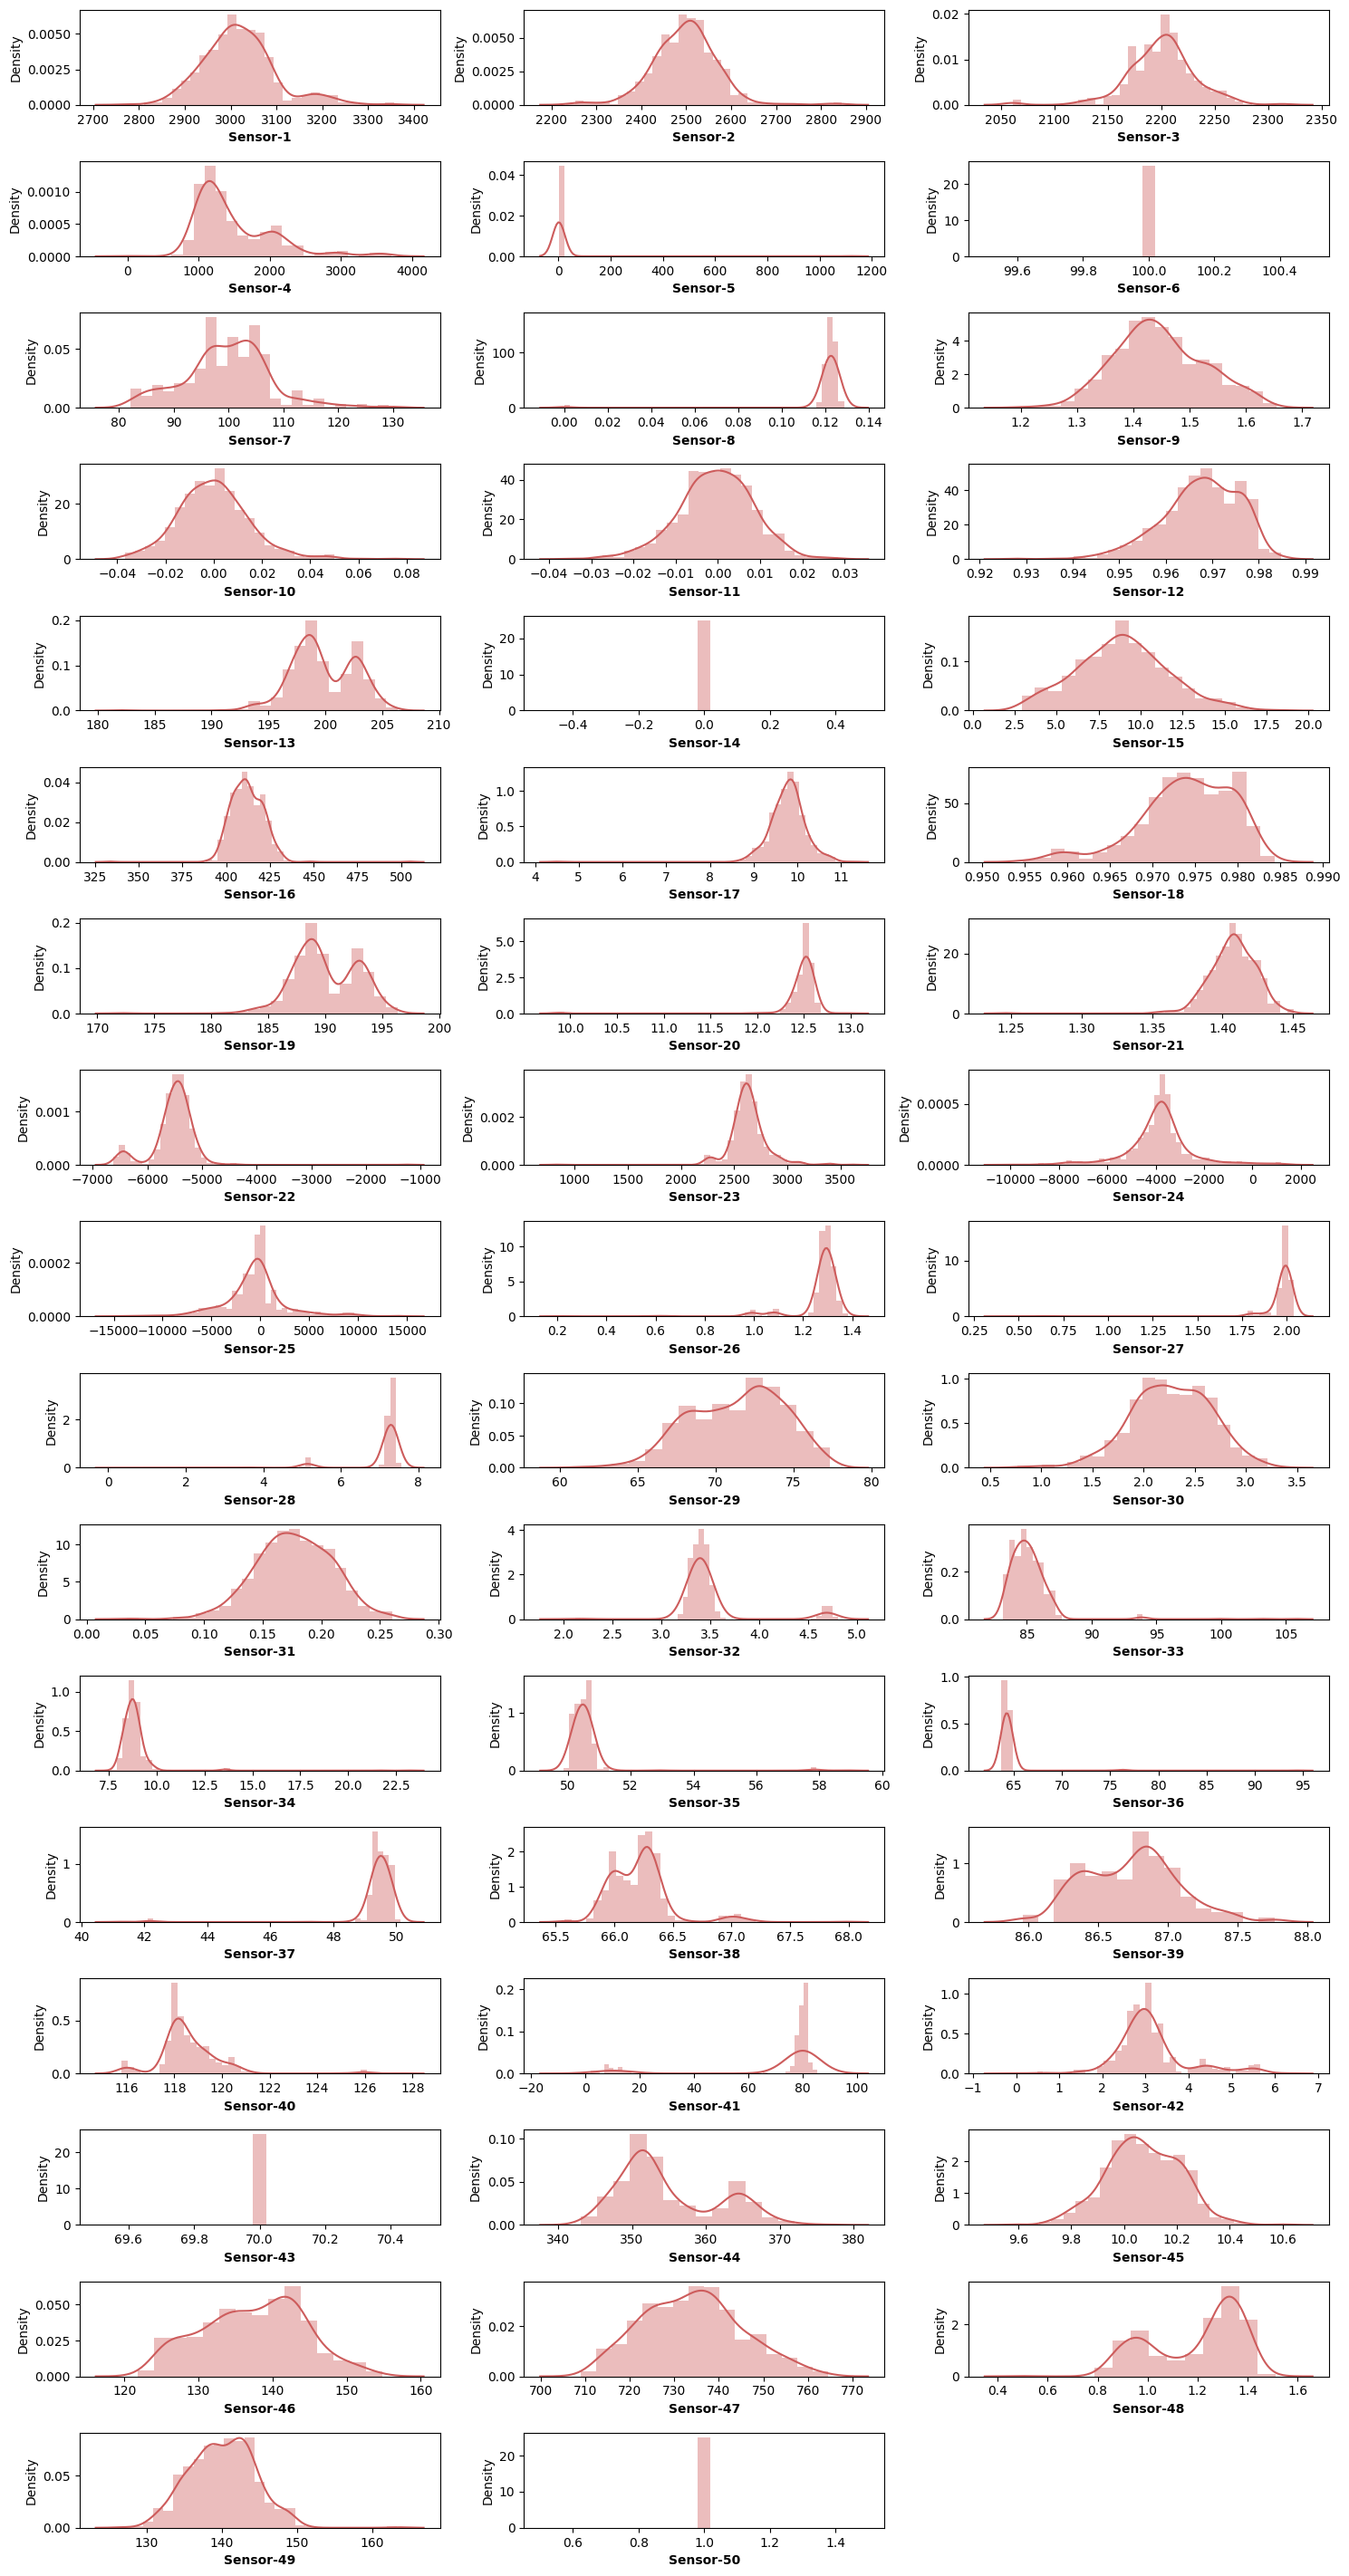

In [8]:
## let's have a look at the distribution first 50 sensors of Wafers

plt.figure(figsize=(15, 100))

for i, col in enumerate(wafers.columns[1:51]):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=wafers[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

In [9]:
## Select 50 random sensors

random_50_sensors_idx = []
for i in range(50):
    if i not in random_50_sensors_idx:
        random_50_sensors_idx.append(np.random.randint(1, 591))

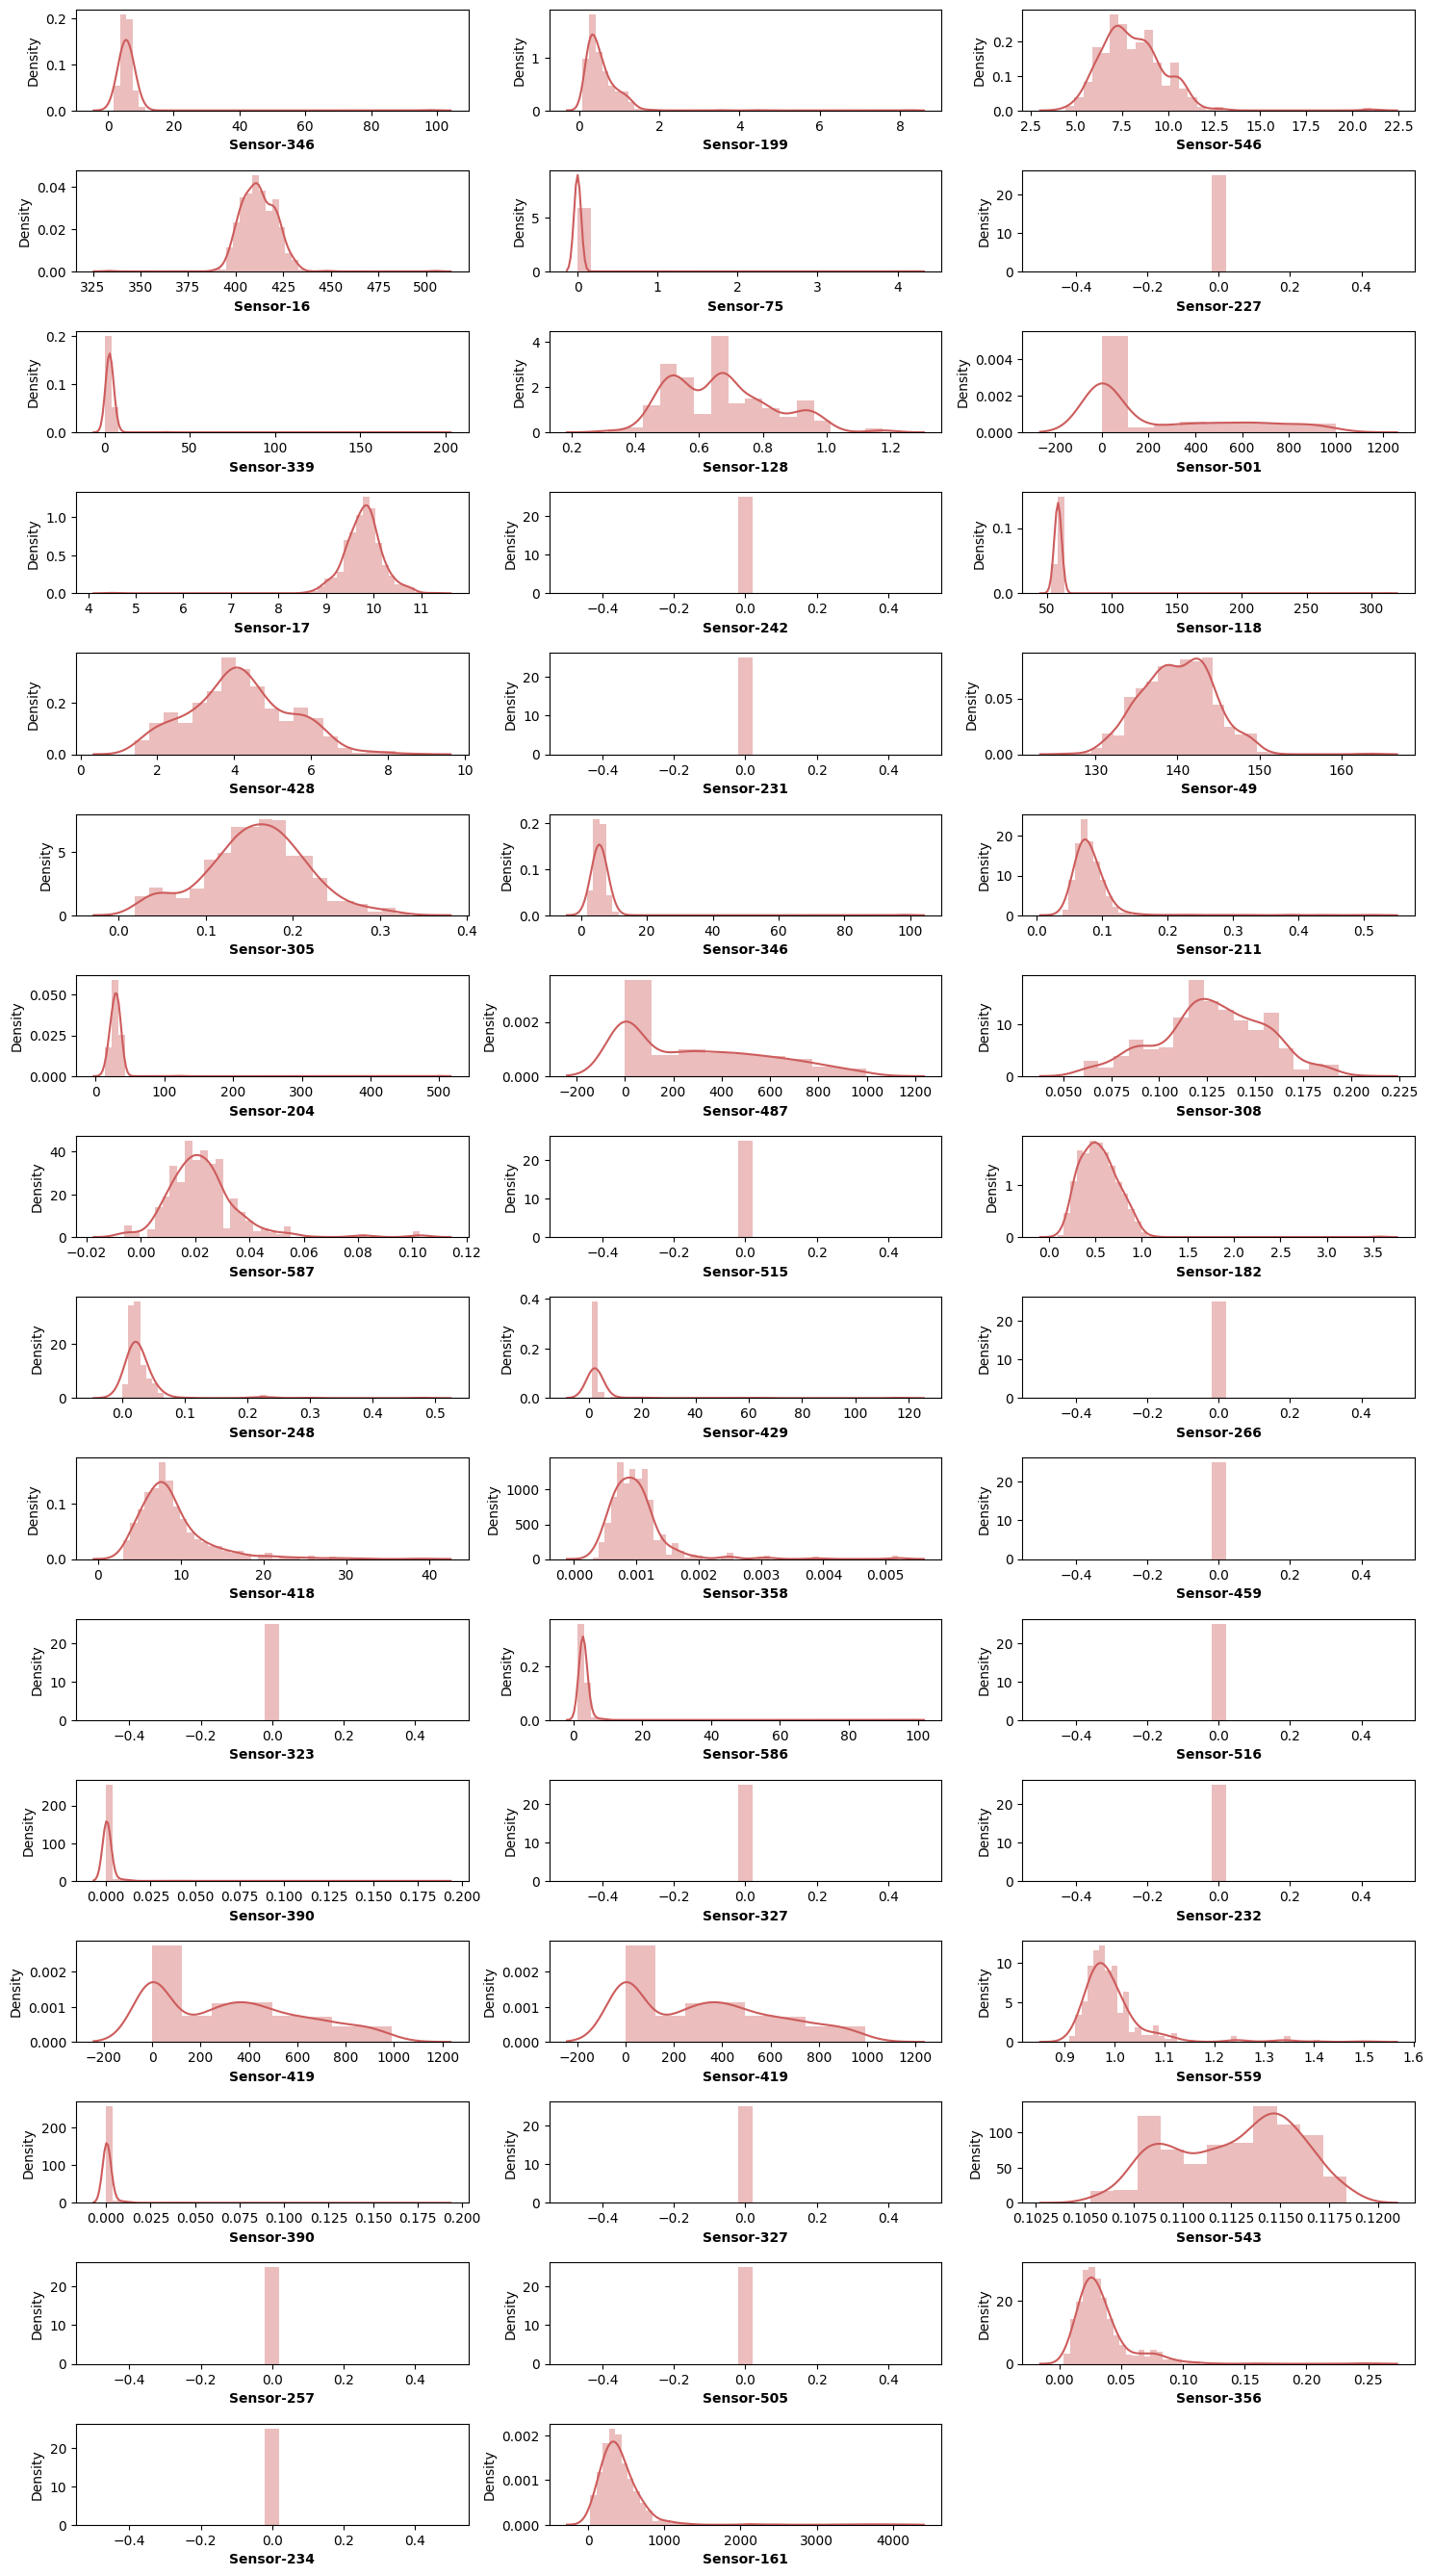

In [10]:
## let's now, have a look at the distribution of random 50 sensors

plt.figure(figsize=(15, 100))

for i, col in enumerate(wafers.columns[random_50_sensors_idx]):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=wafers[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

### Insight:

Pretty good amount of them (either first 50 or random 50) either are constant (have 0 standard deiation) or have left skewness and right skewness. It ain't possible to analyze each feature and deal with its outliers individually, thus we oughta depend upon the scaling. 

For the **features with 0 standard deviation**, we can straight away drop them and for others that do have outliers, we gotta go ahead with the `Robust Scaling`.

### # Get Columns to Drop:

Will drop columns with zero standard deviation as they are not influencing the target variable in any way.

In [8]:
def get_cols_with_zero_std_dev(df: pd.DataFrame):
    """
    Returns the list of columns names who are having zero standard deviation.
    """
    cols_to_drop = []
    num_cols = [col for col in df.columns if df[col].dtype != 'O']  # numerical cols only
    for col in num_cols:
        if df[col].std() == 0:
            cols_to_drop.append(col)
    return cols_to_drop

In [9]:
cols_to_drop = get_cols_with_zero_std_dev(df=wafers)
cols_to_drop.append("Wafer")
cols_to_drop

['Sensor-6',
 'Sensor-14',
 'Sensor-43',
 'Sensor-50',
 'Sensor-53',
 'Sensor-70',
 'Sensor-98',
 'Sensor-142',
 'Sensor-150',
 'Sensor-179',
 'Sensor-180',
 'Sensor-187',
 'Sensor-190',
 'Sensor-191',
 'Sensor-192',
 'Sensor-193',
 'Sensor-194',
 'Sensor-195',
 'Sensor-227',
 'Sensor-230',
 'Sensor-231',
 'Sensor-232',
 'Sensor-233',
 'Sensor-234',
 'Sensor-235',
 'Sensor-236',
 'Sensor-237',
 'Sensor-238',
 'Sensor-241',
 'Sensor-242',
 'Sensor-243',
 'Sensor-244',
 'Sensor-257',
 'Sensor-258',
 'Sensor-259',
 'Sensor-260',
 'Sensor-261',
 'Sensor-262',
 'Sensor-263',
 'Sensor-264',
 'Sensor-265',
 'Sensor-266',
 'Sensor-267',
 'Sensor-277',
 'Sensor-285',
 'Sensor-314',
 'Sensor-315',
 'Sensor-316',
 'Sensor-323',
 'Sensor-326',
 'Sensor-327',
 'Sensor-328',
 'Sensor-329',
 'Sensor-330',
 'Sensor-331',
 'Sensor-365',
 'Sensor-370',
 'Sensor-371',
 'Sensor-372',
 'Sensor-373',
 'Sensor-374',
 'Sensor-375',
 'Sensor-376',
 'Sensor-379',
 'Sensor-380',
 'Sensor-381',
 'Sensor-382',
 'S

**=>** Features that are not gonna contribute to ML algorithm in anyway, whatsoever.

### # Separate Features and Labels out:

In [10]:
## Separate features and Labels out

X, y = wafers.drop(cols_to_drop, axis=1), wafers[["Good/Bad"]]

In [11]:
## Dependent feature variables

print("Shape of the features now: ", X.shape)
X.head()

Shape of the features now:  (837, 475)


,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,3045.98,2544.85,2253.3444,1873.8678,1.1691,94.9722,0.1210,1.4752,0.0084,0.0009,...,NaN,0.4948,0.0123,0.0033,2.4804,0.0291,0.0102,0.0033,35.0279,-1
1,3151.98,2563.75,2175.2556,1022.1660,1.2833,100.6222,0.1250,1.4536,-0.0110,-0.0035,...,NaN,0.5063,0.0113,0.0031,2.2284,0.0291,0.0102,0.0033,35.0279,-1
2,3071.18,2489.86,2195.3000,1151.8233,0.9220,103.5467,0.1232,1.4826,0.0136,0.0009,...,NaN,0.5033,0.0112,0.0029,2.2320,0.0291,0.0102,0.0033,35.0279,-1
3,2958.46,2523.78,2171.8556,1156.6018,1.4025,100.1367,0.1243,1.4645,0.0001,0.0067,...,NaN,0.4954,0.0136,0.0033,2.7511,0.0291,0.0102,0.0033,35.0279,-1
4,3196.21,2413.39,2255.5222,1763.0739,1.2226,101.5878,0.1200,1.4845,-0.0037,0.0049,...,353.8319,0.5058,0.0094,0.0026,1.8673,0.0053,0.0188,0.0057,353.8319,-1


**=>** Now, we have 475 contributing features.

In [12]:
## Independent/Target Variables

y.head()

,Good/Bad
0,-1
1,-1
2,-1
3,-1
4,-1


### # Clustering of Training set:

In [13]:
# %pip install kneed

In [14]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
from dataclasses import dataclass


@dataclass
class Clustering():
    """
    Divides the data into clusters via KMeans cluster algo.
    """
    X: np.array
    
    def get_optimal_number_of_clusters(self):
        """
        Returns the optimal number of clusters the data at hand should be 
        divided into.
        """
        try:
            # Compute WCSS for each possible number of clusters
            wcss = []
            for i in range(1, 11):
                kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
                kmeans.fit(self.X)
                wcss.append(kmeans.inertia_)
                
            # Finalize the number of clusters at where there's the dispersal point
            knee_finder = KneeLocator(range(1,11), wcss, curve='convex', 
                                      direction='decreasing')
            print("Optimal number of clusters to be formed: ", knee_finder.knee)
            return knee_finder.knee   
        except Exception as e:
            print(e)
            
    def create_clusters(self) -> (KMeans, np.array):
        """
        Creates the optimal number of clusters (found via elbow plot) and returns
        the data with the cluster labels.
        """
        try:
            n_ideal_clusters = self.get_optimal_number_of_clusters()

            kmeans = KMeans(n_clusters=n_ideal_clusters, init="k-means++", random_state=42)
            y_kmeans = kmeans.fit_predict(self.X)
            return kmeans, np.c_[self.X, y_kmeans]
        except Exception as e:
            print(e)